In [1]:

# Causal inference and causal impact are related concepts but are not the same thing. 


#  Causal Inference:
# Causal inference is a broader field that deals with understanding cause-and-effect relationships between variables.

# It involves the use of statistical methods and models to infer the causal effect of one variable (the treatment or 
# intervention) on another variable (the outcome or response) while accounting for potential confounding factors.

# Causal inference methods aim to estimate causal effects from observational data or experimental studies.

# It encompasses various techniques such as randomized controlled trials (RCTs), propensity score matching, 
# instrumental variable methods, and structural equation modeling.


#  Causal Impact:
# Causal impact is a specific method or framework used to analyze the causal effect of a particular intervention 
# or treatment on a time series data.

# It is often applied in marketing, economics, and other fields to assess the impact of a marketing campaign, 
# policy change, or other interventions on key metrics over time.

# The causal impact analysis typically involves comparing the observed time series data before and after the 
# intervention to estimate the counterfactual (i.e., what would have happened in the absence of the intervention) 
# and quantify the causal effect of the intervention.
    

In [3]:

# Let's look at an example of Causal Inference.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from causalnex.structure import StructureModel
from causalnex.discretiser import Discretiser
from causalnex.network import BayesianNetwork
from causalnex.inference import InferenceEngine
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer


# Generate synthetic data for crime prediction
np.random.seed(42)

# Features (independent variables)
population_density = np.random.uniform(100, 1000, 1000)
unemployment_rate = np.random.uniform(2, 15, 1000)
poverty_rate = np.random.uniform(5, 30, 1000)

# Continuous target variable (Crime rate)
crime_rate = 50 + 2 * population_density + 3 * unemployment_rate + 5 * poverty_rate + np.random.normal(0, 10, 1000)

# Create a DataFrame
crime_data = pd.DataFrame({
    'PopulationDensity': population_density,
    'UnemploymentRate': unemployment_rate,
    'PovertyRate': poverty_rate,
    'CrimeRate': crime_rate
})
    

In [4]:

# Discretize the features using KMeansDiscretizer
discretised_data = crime_data.copy()
for feature in ['PopulationDensity', 'UnemploymentRate', 'PovertyRate']:
    discretiser = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
    discretised_data[feature] = discretiser.fit_transform(discretised_data[[feature]])
    
    
# Split the data into training and testing sets
train_data, test_data = train_test_split(discretised_data, test_size=0.2, random_state=42)


# Define the structure of the Bayesian Network
sm = StructureModel()
sm.add_edges_from([
    ('PopulationDensity', 'CrimeRate'),
    ('UnemploymentRate', 'CrimeRate'),
    ('PovertyRate', 'CrimeRate'),
])


C:\Users\ryans\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\ryans\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\ryans\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [9]:

# Discretize the target variable
# The double square brackets [['CrimeRate']] create a DataFrame with a single column, 
# ensuring that the input is a 2D array.
train_data['CrimeRate'] = discretiser.fit_transform(train_data[['CrimeRate']])

# Create and fit the Bayesian Network
bn = BayesianNetwork(sm)
bn.fit_node_states(train_data)
bn.fit_cpds(train_data)


# Use the Bayesian Network for causal inference
ie = InferenceEngine(bn)
causal_effects = ie.query()


C:\Users\ryans\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [10]:

print(f'Causal Effects on CrimeRate:')
for variable, effect in causal_effects.items():
    print(f'{variable}: {effect}')
    

# Print the interpretation of the results
print(f'Causal Effects on CrimeRate:')
for variable, effect in causal_effects.items():
    print(f'{variable}:')
    print(f'  Effect Information: {effect}')
    print()
    

Causal Effects on CrimeRate:
PopulationDensity: {0.0: 0.22374999999999998, 1.0: 0.19875000000000004, 2.0: 0.18625, 3.0: 0.18000000000000005, 4.0: 0.21125}
CrimeRate: {0.0: 0.22631938810239235, 1.0: 0.19308480017885765, 2.0: 0.19631787329799114, 3.0: 0.17803114766555056, 4.0: 0.2062467907552083}
UnemploymentRate: {0.0: 0.1925, 1.0: 0.16374999999999995, 2.0: 0.195, 3.0: 0.2275, 4.0: 0.22125000000000003}
PovertyRate: {0.0: 0.185, 1.0: 0.20750000000000002, 2.0: 0.19875000000000004, 3.0: 0.2, 4.0: 0.20875}
Causal Effects on CrimeRate:
PopulationDensity:
  Effect Information: {0.0: 0.22374999999999998, 1.0: 0.19875000000000004, 2.0: 0.18625, 3.0: 0.18000000000000005, 4.0: 0.21125}

CrimeRate:
  Effect Information: {0.0: 0.22631938810239235, 1.0: 0.19308480017885765, 2.0: 0.19631787329799114, 3.0: 0.17803114766555056, 4.0: 0.2062467907552083}

UnemploymentRate:
  Effect Information: {0.0: 0.1925, 1.0: 0.16374999999999995, 2.0: 0.195, 3.0: 0.2275, 4.0: 0.22125000000000003}

PovertyRate:
  Effe

In [ ]:

# How can we interpret the final results?

# The estimated effects provided for each level (bin) of UnemploymentRate and PovertyRate represent the causal 
# effects of these variables on CrimeRate as predicted by the Bayesian Network model.

# In causal inference, a causal effect is an estimate of the change in the outcome variable (in this case, 
# CrimeRate) that is directly attributable to a change in the predictor variable (such as UnemploymentRate or 
# PovertyRate). 


# UnemploymentRate:

#  For each bin of UnemploymentRate (0.0, 1.0, 2.0, 3.0, 4.0), the estimated effect on CrimeRate is given.
#  For example, when UnemploymentRate is in the bin 0.0, the estimated effect on CrimeRate is approximately 
#  0.1925. Similarly, for other bins.


# PovertyRate:

#  Similar interpretation applies to PovertyRate. Each bin of PovertyRate (0.0, 1.0, 2.0, 3.0, 4.0) has an 
#  estimated effect on CrimeRate.
#  For example, when PovertyRate is in the bin 0.0, the estimated effect on CrimeRate is approximately 0.1850. 
#  Similarly, for other bins.


# These values represent the estimated change in CrimeRate associated with a one-unit increase in the respective 
# bin of UnemploymentRate or PovertyRate. The positive values suggest a positive association, indicating that 
# higher levels of UnemploymentRate or PovertyRate are associated with higher CrimeRate.


In [6]:

# Let's look at an example of Causal Impact.

# DOW 30 stocks
df_tickers = ['AMZN',
'AXP',
'AMGN',
'AAPL',
'BA',
'CAT',
'CSCO',
'CVX',
'GS',
'HD',
'HON',
'IBM',
'INTC',
'JNJ',
'KO',
'JPM',
'MCD',
'MMM',
'MRK',
'MSFT',
'NKE',
'PG',
'TRV',
'UNH',
'CRM',
'VZ',
'V',
'WMT',
'DIS',
'DOW',
'SBUX']



import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import datetime as dt
import math
from datetime import datetime, timedelta
from pandas_datareader import data as wb
from sklearn.cluster import KMeans
np.random.seed(777)
import yfinance as yf

import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
from causalimpact import CausalImpact

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)



# current date minus a month
from datetime import datetime
from dateutil.relativedelta import relativedelta

# minus a month
currentTimeDate = datetime.now() - relativedelta(months=3)
start = currentTimeDate.strftime('%Y-%m-%d')
end = datetime.now().strftime('%Y-%m-%d')
print(start)
print(end)


start = start
end = end


tickers = df_tickers
thelen = len(tickers)


i=0
price_data = []
for ticker in tickers:
    data = yf.download(ticker, start=start, end=end)
    print(i)
    i=i+1
    #data = yf.download(ticker, start, end)
    data = data.reset_index()
    prices = data.loc[:,['Date','Adj Close']]
    price_data.append(prices.assign(ticker=ticker)[['ticker', 'Date', 'Adj Close']])
df = pd.concat(price_data)

print(df.dtypes)
print(df.head())
print('---------------')
print(df.tail())
print(df.shape)


2023-12-08
2024-03-08
[*********************100%%**********************]  1 of 1 completed
0
[*********************100%%**********************]  1 of 1 completed
1
[*********************100%%**********************]  1 of 1 completed
2
[*********************100%%**********************]  1 of 1 completed
3
[*********************100%%**********************]  1 of 1 completed
4
[*********************100%%**********************]  1 of 1 completed
5
[*********************100%%**********************]  1 of 1 completed
6
[*********************100%%**********************]  1 of 1 completed
7
[*********************100%%**********************]  1 of 1 completed
8
[*********************100%%**********************]  1 of 1 completed
9
[*********************100%%**********************]  1 of 1 completed
10
[*********************100%%**********************]  1 of 1 completed
11
[*********************100%%**********************]  1 of 1 completed
12
[*********************100%%**********************]  

In [7]:

pd.set_option('display.max_columns', 500)


df = df.set_index('Date')
table = df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension you can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]


# By convention, the test group is usually labelled as y and the control groups as X.

table.rename(columns={'SBUX':'y'}, inplace=True)

print(table.head())
print('---------------')
print(table.tail())


                  AAPL        AMGN        AMZN         AXP          BA  \
Date                                                                     
2023-12-08  195.460587  267.032501  147.419998  167.887604  244.699997   
2023-12-11  192.933807  270.029083  145.889999  167.847733  248.080002   
2023-12-12  194.461868  271.864716  147.479996  170.489197  248.630005   
2023-12-13  197.707718  279.435547  148.839996  173.997864  250.910004   
2023-12-14  197.857529  274.176666  147.419998  178.284027  256.239990   

                   CAT         CRM       CSCO         CVX        DIS  \
Date                                                                   
2023-12-08  258.303314  250.809998  48.006447  142.752319  92.820000   
2023-12-11  259.716766  252.100006  49.008648  142.791901  92.199997   
2023-12-12  260.224396  256.450012  48.949112  140.961853  91.070000   
2023-12-13  266.734253  257.320007  49.306332  143.049088  92.830002   
2023-12-14  283.854950  257.209991  49.058262  14

C:\Users\ryan_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               Average      Cumulative
Actual                             182            3828
Predicted                          164            3445
95% CI                      [162, 165]    [3413, 3478]
                                                      
Absolute Effect                     18             382
95% CI                        [19, 16]      [415, 349]
                                                      
Relative Effect                  11.1%           11.1%
95% CI                  [12.0%, 10.2%]  [12.0%, 10.2%]
                                                      
P-value                           0.0%                
Prob. of Causal Effect          100.0%                
None
---------------
During the post-intervention period, the response             variable had an average value of             approx. 182.
By contrast, in  the absence of an intervention, we would have expected an average response of 164. The 95% interval of
this counterfactual pred

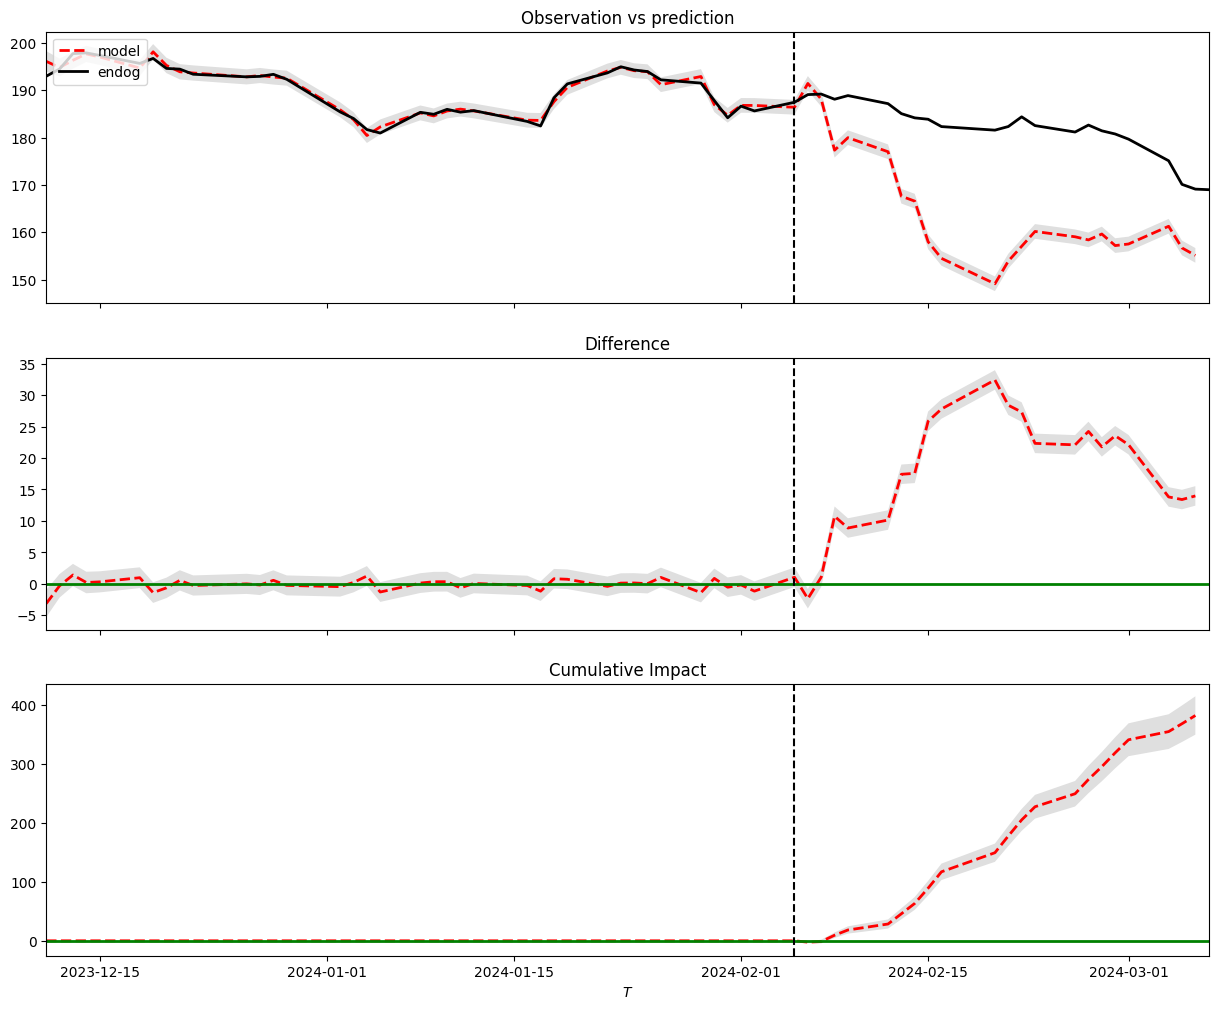

In [10]:

# Dates
training_start = "2023-12-07"
training_end = "2024-02-05"
treatment_start = "2024-02-06"
treatment_end = "2024-03-06"


pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]


impact = CausalImpact(table, pre_period, post_period)
impact.run()


print(impact.summary())
print('---------------')
print(impact.summary('report'))


impact.plot()


In [ ]:

#  Outcome:

# The goal of causal inference is to provide insights into causal relationships between variables, helping researchers 
# make informed decisions and policy recommendations.

# Causal impact analysis provides specific estimates of the effect of interventions or treatments on time series data, 
# enabling practitioners to assess the effectiveness of interventions and make data-driven decisions
    

In [ ]:

# Data Set Available Here:
# https://www.kaggle.com/datasets/manjeetsingh/retaildataset
